![](../sessions/img/logo.png)

# K-means clustering

## Yoav Ram

In this exercise we will use experiment with K-means clustering.
It is recommended to first complete the [introduction to PCA](../notebooks/PCA.ipynb).

K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster (see [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)). There's a good visual explanation at [Stanford's EE103](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html).

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from yellowbrick.cluster import intercluster_distance, kelbow_visualizer

sns.set_context('talk')

# Example: digits dataset

We use the digits dataset that we already saw in the [PCA session](../notebooks/PCA.ipynb).

Since we know the correct classification, we can use that to verify that the clustering works well.

In [2]:
from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
Y = Y.astype(int)
nsamples, nfeatures = X.shape

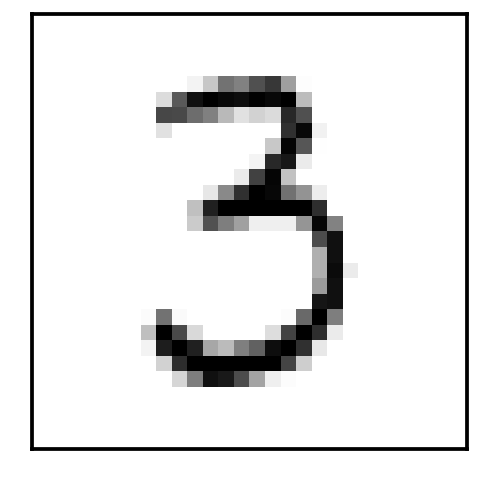

In [3]:
def display_image(im, ax=None):
    if ax is None: fig, ax = plt.subplots()
    ax.imshow(im.reshape(28, 28), cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
    
display_image(X[50])

As usual in Scikit-learn, we start by creating the model and fitting it to the data.
This is an unsupervised learning algorithm, so `y` is not required (and indeed ignored if given).

In [5]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

Now we can do several things. First, lets look at the centeroid of each cluster by taking `cluster_centers_`.

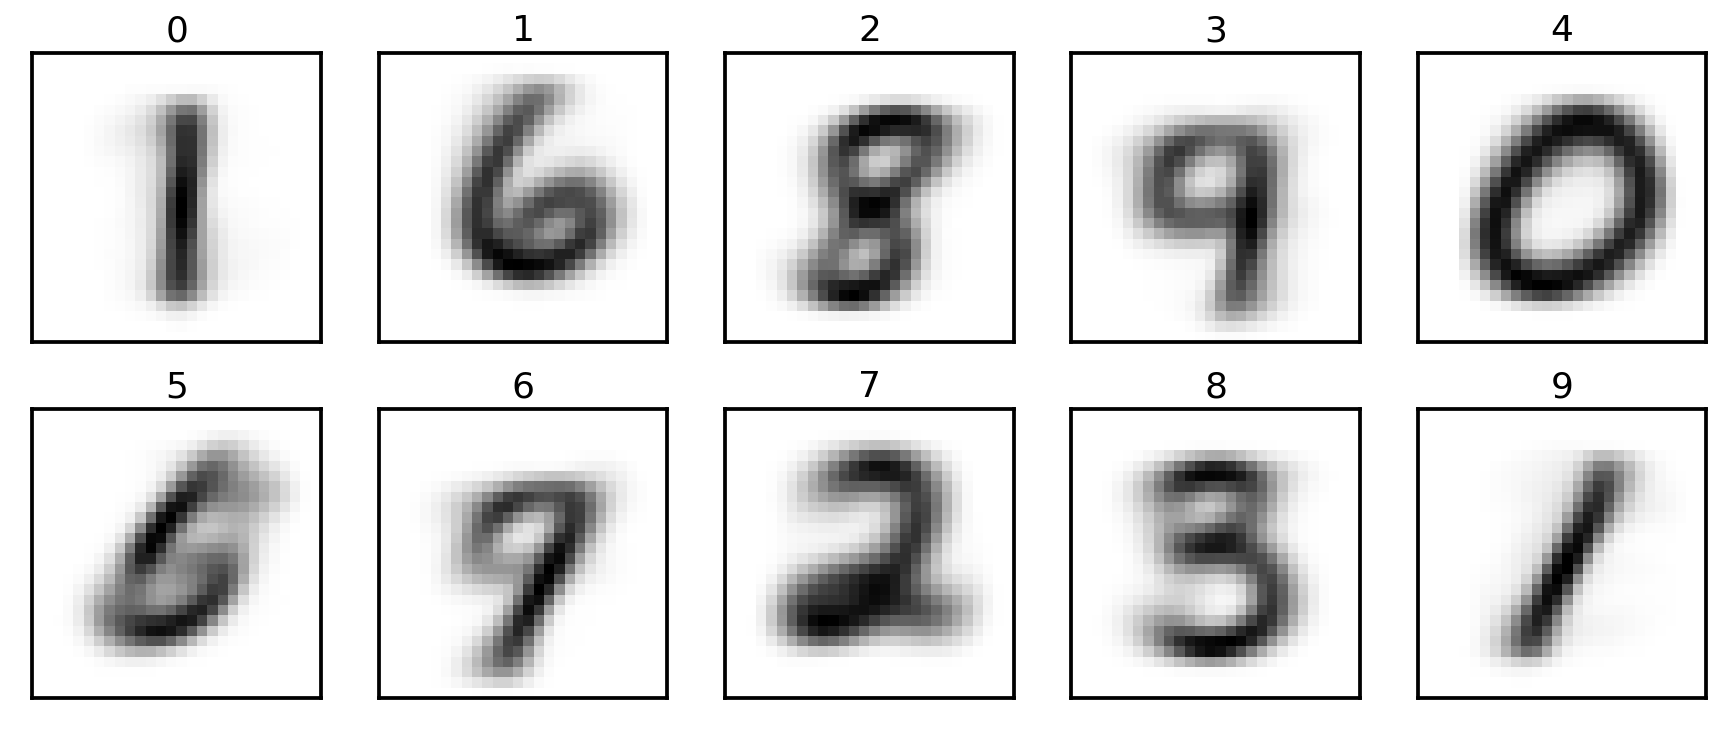

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for cluster, cluster_center, ax in zip(range(10), kmeans.cluster_centers_, axes.flat):
    ax.set_title(cluster)
    display_image(cluster_center, ax=ax)

We can also `predict` on the test data to get the cluster of each test sample.

Clusters for zero digits


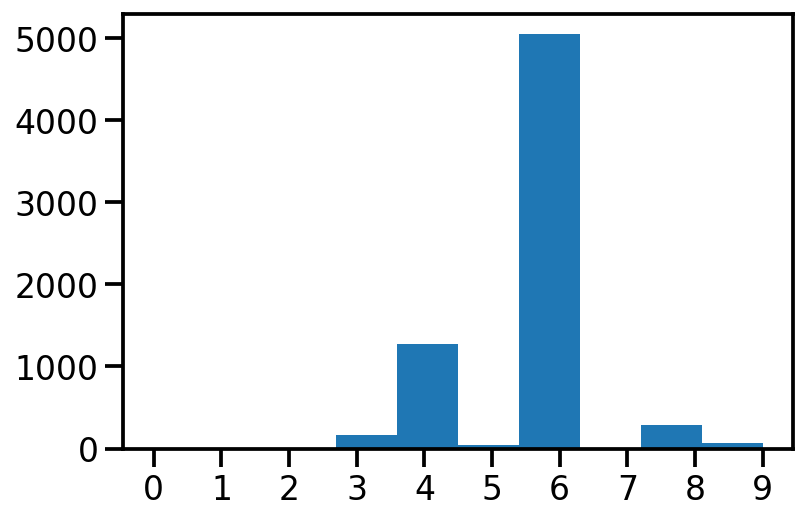

In [20]:
print("Clusters for zero digits")
idx = Y==0
clusters = kmeans.predict(X[idx])
plt.hist(clusters, 10)
plt.xticks(range(10));

It is unclear if 10 is enough clusters for this dataset; we can try to use the [elbow visualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) to determine if more clusters are needed.

## Visualization

If we first apply PCA to the data, then we can apply K-means on PCA-reduced data, which will allow us to plot the results.

Here we can see the PCA transformed points in black circles, the K-means centroids in white x-marks, and the K-means clusters in different background colors.

In [4]:
pca = PCA(n_components=2)
pca.fit(X[:10000])
X_ = pca.transform(X)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_)

KMeans(n_clusters=10)

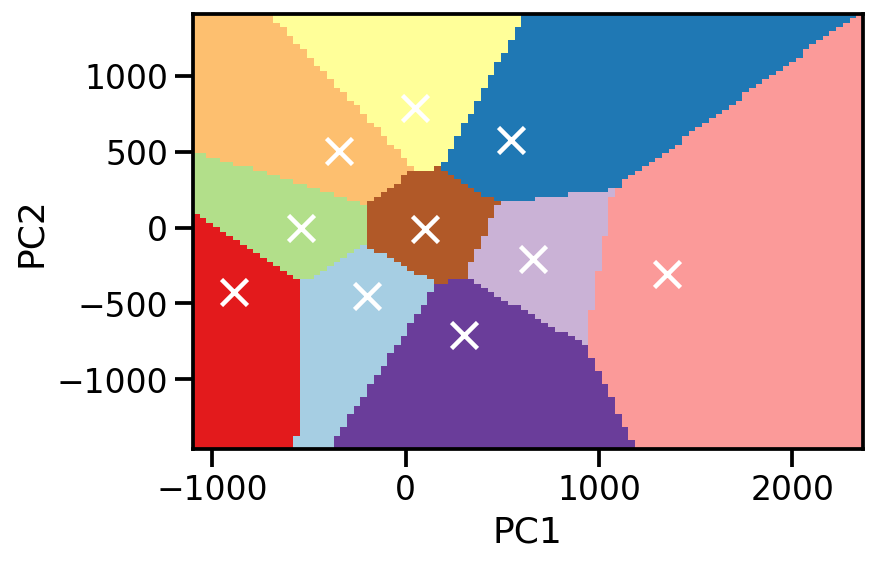

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plt.plot(X_[:, 0], X_[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlabel('PC1')
plt.ylabel('PC2');

# Exercise: seeds dataset

We start by loading the data.

In [21]:
df = pd.read_csv('../data/seeds_dataset.txt', sep='\t')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove,cultivar
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [24]:
target_name = 'cultivar'
feature_names = list(df.columns)
feature_names.remove(target_name)

X = df[feature_names].values
y = df[target_name].values

**Use the [elbow visualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)** to determine the number of clusters.

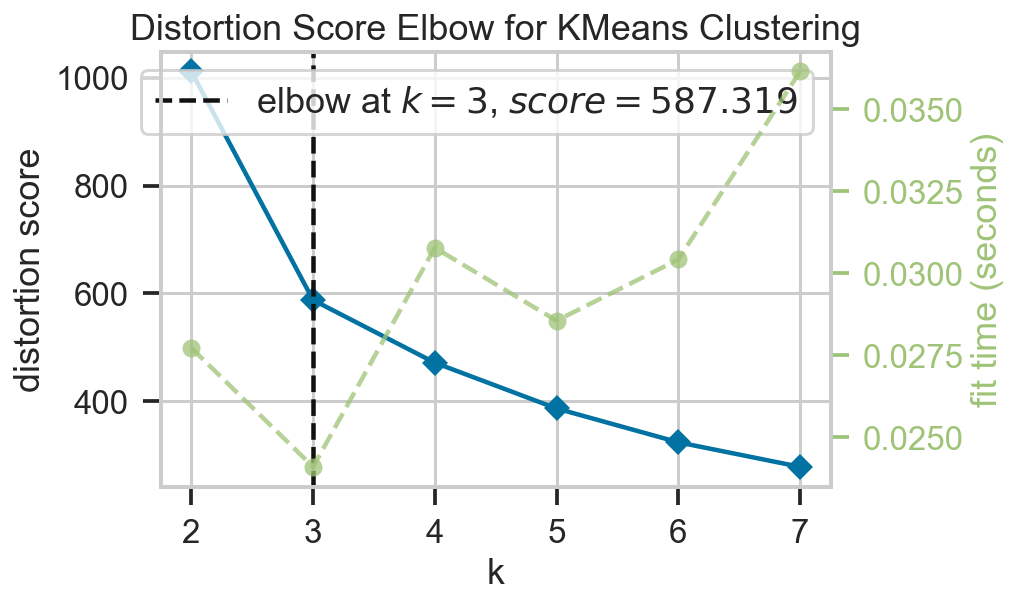

In [27]:
kelbow_visualizer(KMeans(), X, k=(2,8));

**Create and fit a KMeans** clustering with the number of clusters found above using the elbow method.

In [34]:
kmeans = KMeans(3)
kmeans.fit(X);

**Plot the clusters distances using [intercluster distance mapping](https://www.scikit-yb.org/en/latest/api/cluster/icdm.html)**, which displays an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved.

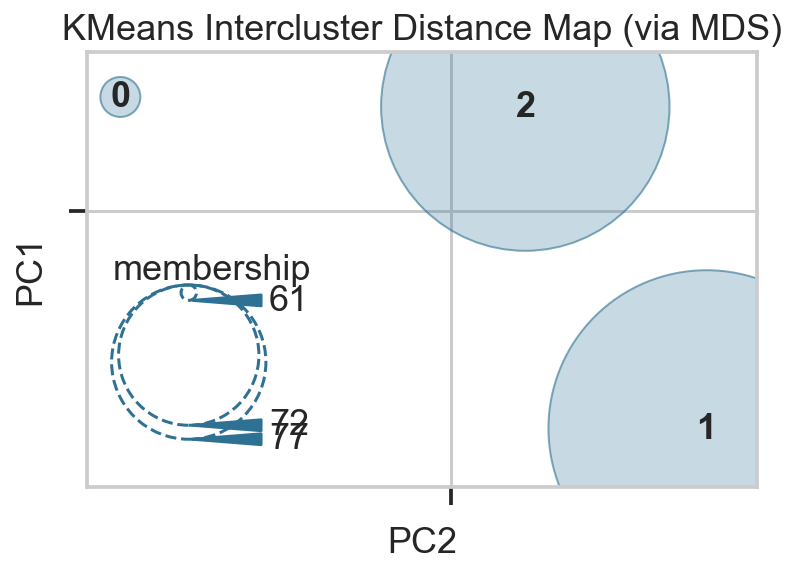

In [35]:
intercluster_distance(kmeans, X);

**Print the features of the cluster centers**.

In [39]:
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])
centers_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove
0,18.721803,16.297377,0.885087,6.208934,3.722672,3.603590,6.066098
1,11.964416,13.274805,0.852200,5.229286,2.872922,4.759740,5.088519
2,14.648472,14.460417,0.879167,5.563778,3.277903,2.648933,5.192319


# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.6.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)